# ITS307 Data Analytics : Spring Semester 2022
# Assignment 2
# Supervised Learning - Linear Regression


# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> EDA  </li>
<li> Feature Engineering  </li>
<li> Training Model</li>
<li> Predicting</li>
<li> Evaluating Model</li>

</ol>

# Learning Objectives

Second-hand car have huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment.

The dataset shared contains some of the features that determines the second hand car's price in India. Some of the features of are:
- Name: The brand and model of the car
- Location: The location in which the car is being sold or is available for purchase.
- Year: Year or edition of the model
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM
- Fuel_Type: The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car. (Automatic / Manual)
- Owner_Type: Whether the owner is first owner or second owner and so on.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC.
- Power:
- Seat: Number of the seat of car
- New_Price: Price of the car when its new/first hand
- Price (Target) : Price of the used car


# 1. Loading Libraries

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [227]:
#Read the data into a dataframe
df_train = pd.read_csv("train-data.csv")
df_test = pd.read_csv("test-data.csv")

df_train.head()


Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [228]:
df_train.shape

(6019, 14)

In [229]:
df_test.shape

(1234, 13)

In [230]:
df_test.head()

Unnamed: 0                                       Name    Location  Year  \
0           0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1           1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2           2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3           3                       Toyota Etios Liva GD   Hyderabad  2012   
4           4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

# 2. Loading and Cleaning with Pandas

In [231]:
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [232]:
df_test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [233]:
#Dorp Unnamed column 
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [234]:
## Drop New_Price column as it has many null values.
df_train.drop('New_Price', axis=1, inplace=True)
df_test.drop('New_Price', axis=1, inplace=True)

In [235]:
#Droping all other null values
df_train.dropna(how ='any',inplace=True)
df_test.dropna(how ='any', inplace=True)


In [236]:
df_train.columns.values


array(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'], dtype=object)

In [237]:
df_test.columns.values

array(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats'], dtype=object)

In [238]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [239]:
## Converting Mileage, Engine and Power to numerical columns
df_train.Mileage = df_train.Mileage.str.split().str.get(0).astype('float')
df_train.Engine = df_train.Engine.str.split().str.get(0).astype('int', errors='ignore')
df_train.Power = df_train.Power.str.split().str.get(0).astype('float', errors='ignore')
df_test.Mileage = df_test.Mileage.str.split().str.get(0).astype('float')
df_test.Engine = df_test.Engine.str.split().str.get(0).astype('int', errors='ignore')
df_test.Power = df_test.Power.str.split().str.get(0).astype('float', errors='ignore')

In [240]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int32
Power                 object
Seats                float64
Price                float64
dtype: object

In [241]:
df_train.head(10)

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
5      Hyundai EON LPG Era Plus Option   Hyderabad  2012              75000   
6               Nissan Micra Diesel XV      Jaipur  2013              86999   
7    Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016              36000   
8  Volkswagen Vento Diesel Comfortline        Pune  2013              64430   
9       Tata Indica Vista Quadrajet LS     Chennai  2012              65932   

  Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  
0       CNG       Manual      First    26.60     998  58.16    5.0   1.75  
1    Diesel       Manual      First    19.67    1582  126.2    5.0  12.50  
2    Petrol       Manual      First    18.20    1199   88.7    5.0   4.50  
3    Diesel       Manual      First    20.77    1248  88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20    1968  140.8    5.0  17.74  
5       LPG       Manual      First    21.10     814   55.2    5.0   2.35  
6    Diesel       Manual      First    23.08    1461   63.1    5.0   3.50  
7    Diesel    Automatic      First    11.36    2755  171.5    8.0  17.50  
8    Diesel       Manual      First    20.54    1598  103.6    5.0   5.20  
9    Diesel       Manual     Second    22.30    1248     74    5.0   1.95

In [242]:
df_train.shape

(5975, 12)

In [243]:
df_test.shape

(1223, 11)

# 3.  EDA and Visualization

In [244]:
df_train.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine  Power  Seats  Price  
0       CNG       Manual      First    26.60     998  58.16    5.0   1.75  
1    Diesel       Manual      First    19.67    1582  126.2    5.0  12.50  
2    Petrol       Manual      First    18.20    1199   88.7    5.0   4.50  
3    Diesel       Manual      First    20.77    1248  88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.20    1968  140.8    5.0  17.74

In [245]:
new_train = df_train[['Kilometers_Driven','Mileage','Engine','Price']]

In [246]:
#looking for correlation
corr = new_train.corr() 
corr

Kilometers_Driven   Mileage    Engine     Price
Kilometers_Driven           1.000000 -0.064991  0.090832 -0.011263
Mileage                    -0.064991  1.000000 -0.598638 -0.313877
Engine                      0.090832 -0.598638  1.000000  0.659117
Price                      -0.011263 -0.313877  0.659117  1.000000

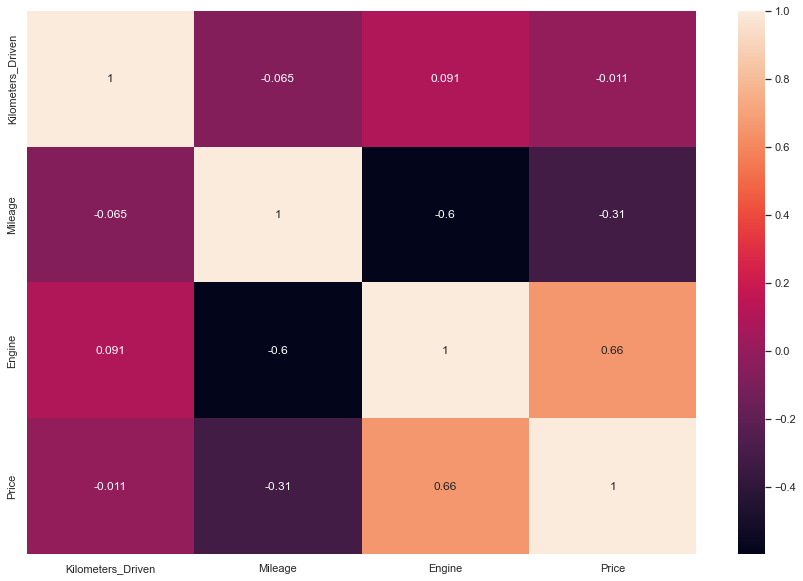

In [247]:
#visualize correlation using heatmap
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)
plt.show()

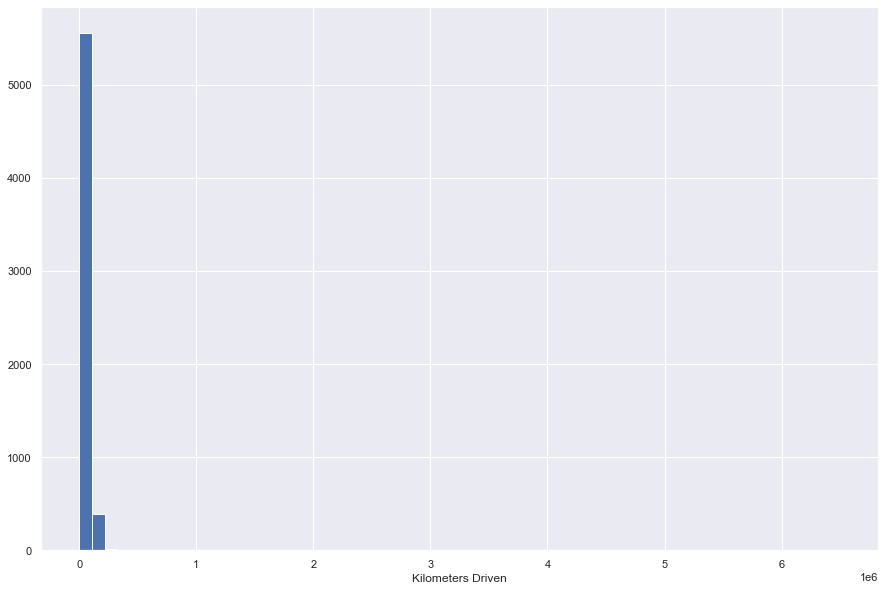

In [248]:
plt.hist(new_train.Kilometers_Driven,bins=60)
plt.xlabel('Kilometers Driven')
plt.show()

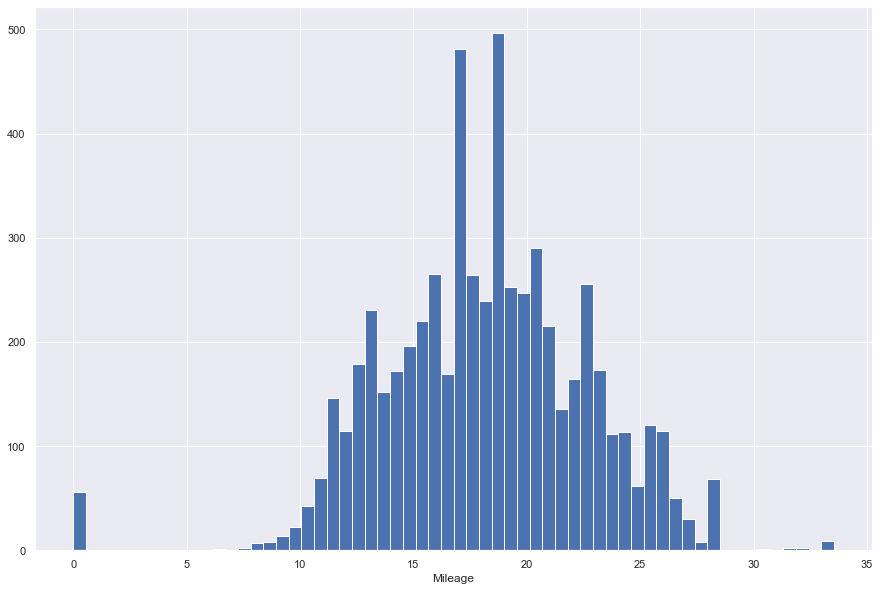

In [249]:
plt.hist(new_train.Mileage,bins=60)
plt.xlabel('Mileage')
plt.show()

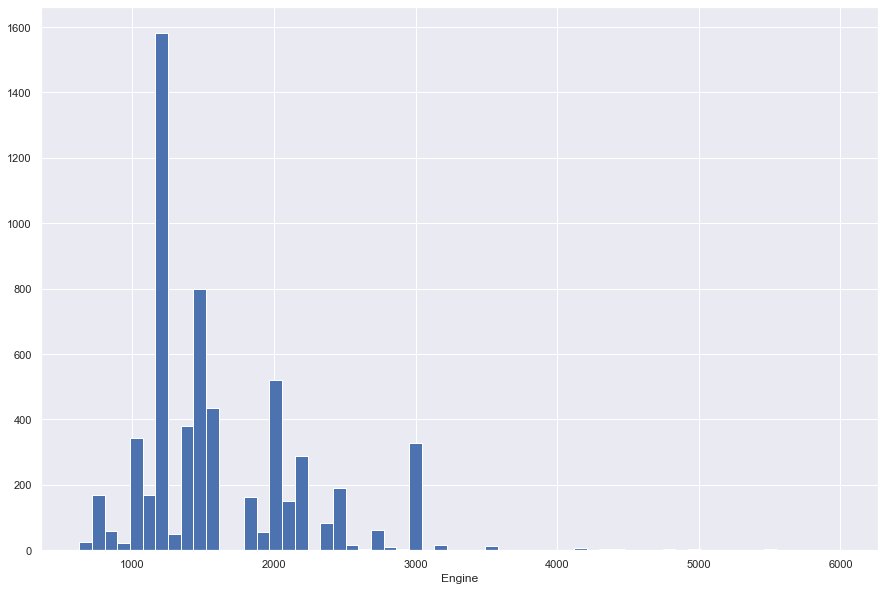

In [250]:
plt.hist(new_train.Engine,bins=60)
plt.xlabel('Engine')
plt.show()

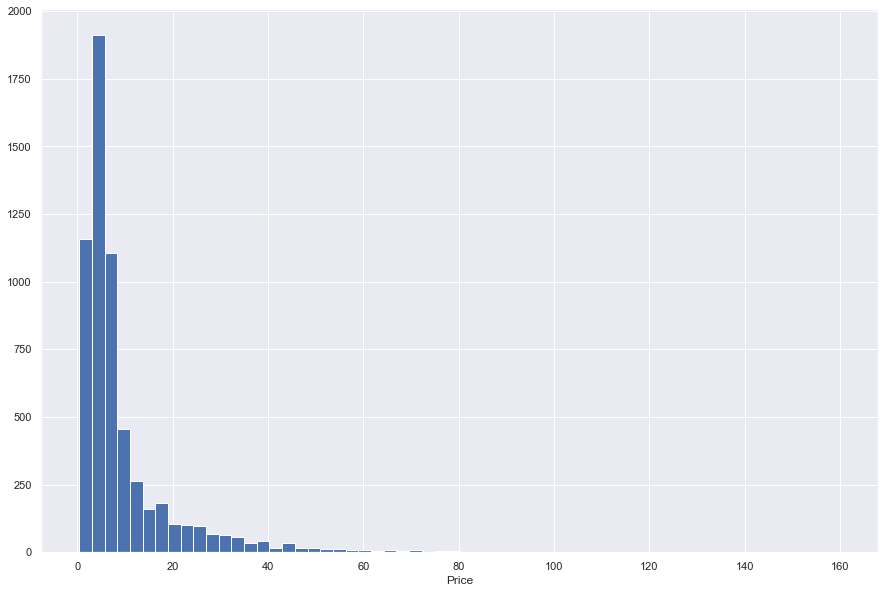

In [251]:
plt.hist(new_train.Price,bins=60)
plt.xlabel('Price')
plt.show()

# 4. Feature Engineering 

IQR Method

<AxesSubplot:xlabel='Kilometers_Driven'>

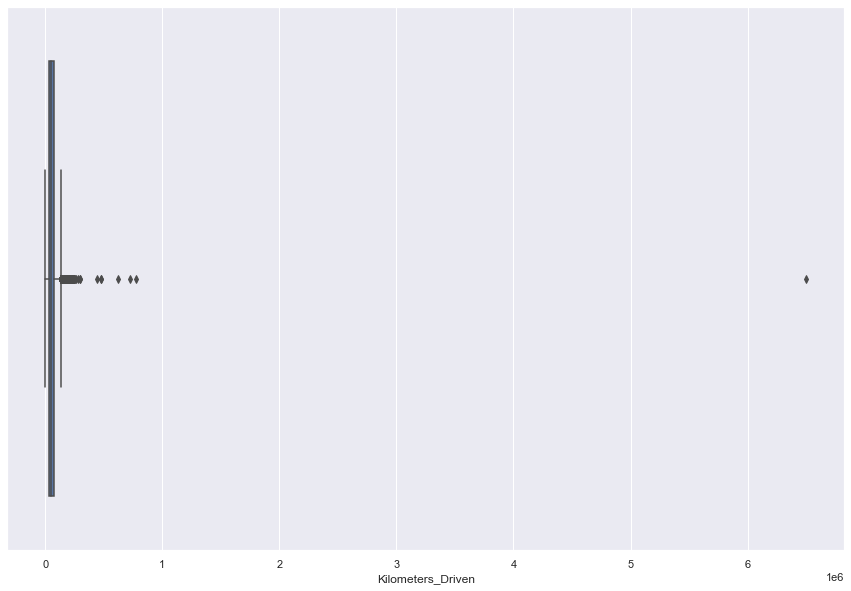

In [252]:
sns.boxplot(x=new_train['Kilometers_Driven'])

In [253]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_train.Kilometers_Driven.quantile(0.25)
Q3 = new_train.Kilometers_Driven.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [254]:
## checking outlier
new_train[(new_train.Kilometers_Driven < lowerlimit)  | (new_train.Kilometers_Driven > upperlimit)]

Kilometers_Driven  Mileage  Engine  Price
29               262000     12.8    2494   4.00
64               178000     25.0    1396   2.50
77               230000     12.4    1998   4.50
154              136997     17.2    1968   8.50
164              147898     22.7    1498   4.42
...                 ...      ...     ...    ...
5852             192000     12.8    2494   6.85
5871             180000     10.9    2499   7.50
5914             132000     18.7    1896   2.25
5953             140000     20.0    1399   2.51
5957             186679     13.0    1493   1.76

[201 rows x 4 columns]

In [255]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_train[(new_train.Kilometers_Driven > lowerlimit) & (new_train.Kilometers_Driven < upperlimit)]
df1.shape

(5774, 4)

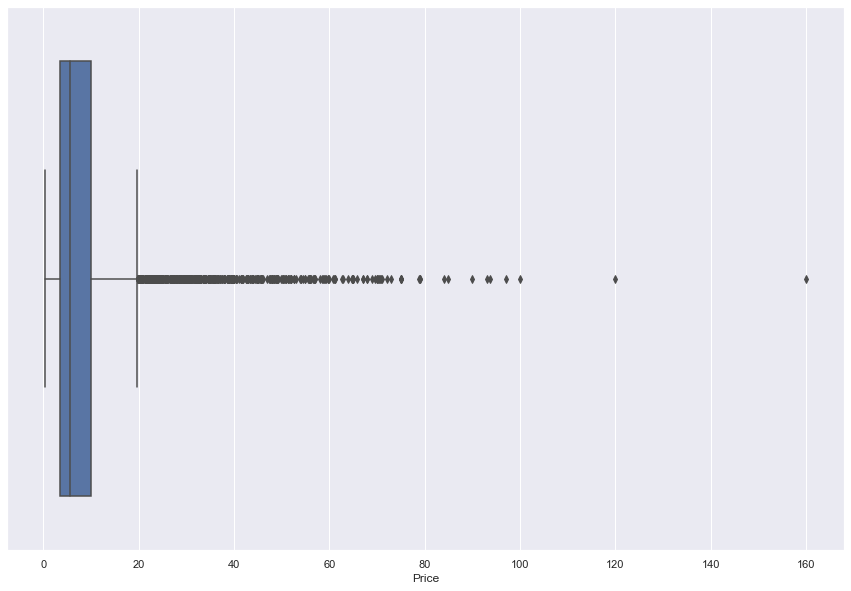

In [256]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Price'])
plt.show()

<AxesSubplot:xlabel='Mileage'>

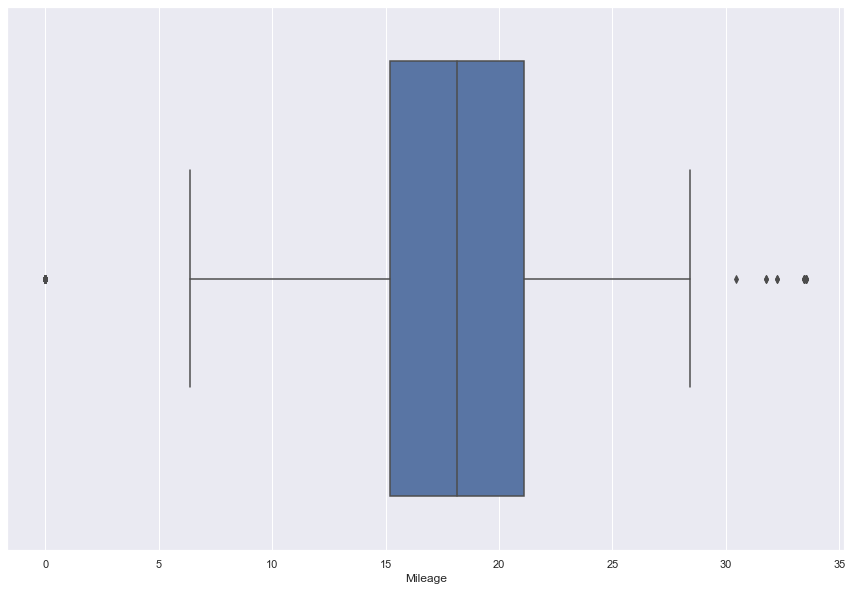

In [257]:
#Mileage
sns.boxplot(x=new_train['Mileage'])

In [258]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_train.Mileage.quantile(0.25)
Q3 = new_train.Mileage.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [259]:
## checking outlier
new_train[(new_train.Mileage < lowerlimit)  | (new_train.Mileage > upperlimit)]

Kilometers_Driven  Mileage  Engine  Price
14                85000     0.00    2179  17.50
67                15369     0.00    1950  35.67
79                87591     0.00    1086   1.30
262               99000     0.00    1086   1.75
307               58000     0.00    1086   1.50
...                 ...      ...     ...    ...
5875               4000     0.00    1950  35.00
5935              59525    32.26     998   3.10
5943              75000     0.00    2112   1.70
5972              65000     0.00    1086   1.39
6011              53000     0.00    3597   4.75

[70 rows x 4 columns]

In [260]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_train[(new_train.Mileage > lowerlimit) & (new_train.Mileage < upperlimit)]
df1.shape

(5905, 4)

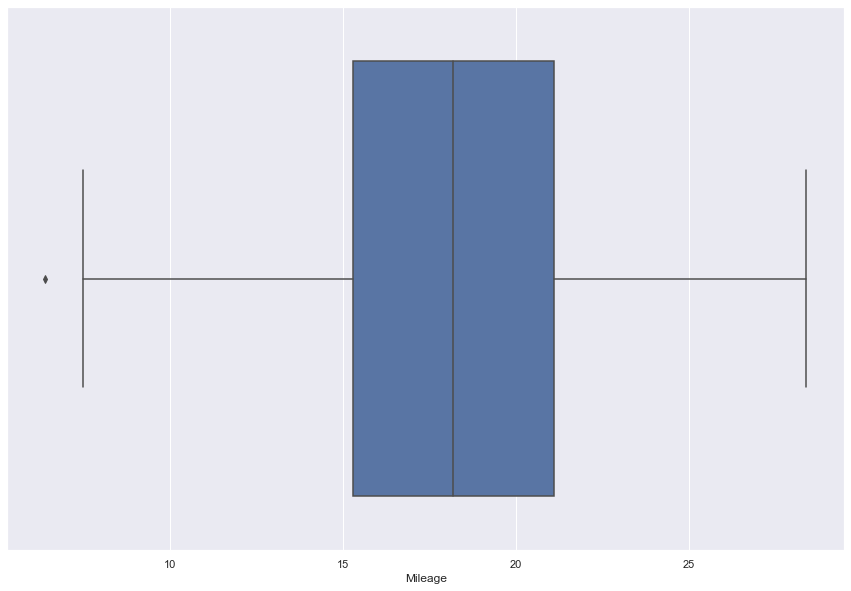

In [261]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Mileage'])
plt.show()

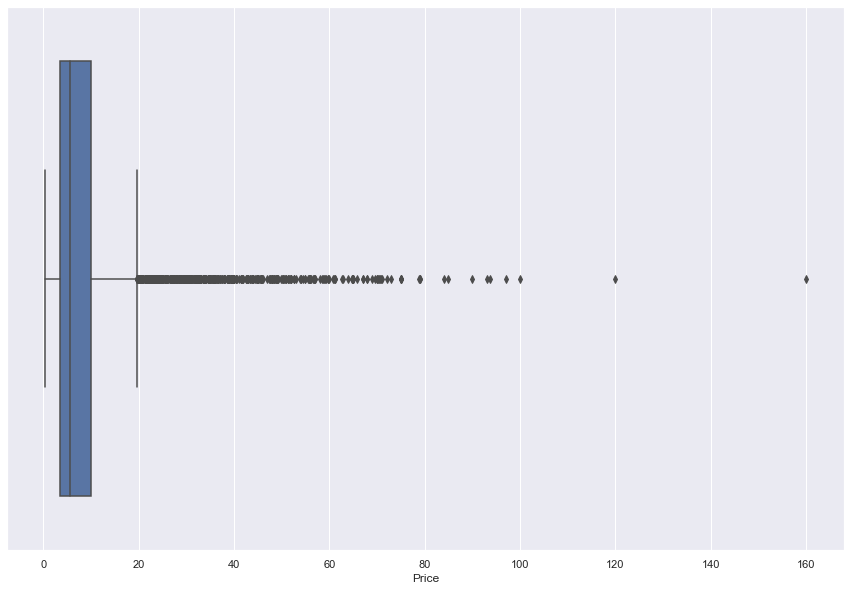

In [262]:
###.....................PRICE.............###
## ploting boxplot to check outliers
sns.boxplot(x=new_train['Price'])
plt.show()

In [263]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_train.Price.quantile(0.25)
Q3 = new_train.Price.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [264]:
## checking outlier
new_train[(new_train.Price < lowerlimit)  | (new_train.Price > upperlimit)]

Kilometers_Driven  Mileage  Engine  Price
13                72000    12.70    2179  27.00
19                78500    14.84    2143  28.00
22                55985    13.53    1984  23.50
38                85000    11.74    2987  28.00
50                13648    17.11    1968  21.43
...                 ...      ...     ...    ...
5950              65630    15.73    1968  21.75
5970              17773    13.70    1991  26.76
5996              31150    16.36    2179  30.54
6008              40000    17.85    2967  45.00
6009              33500    19.16    2494  19.75

[716 rows x 4 columns]

In [265]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_train[(new_train.Price > lowerlimit) & (new_train.Price < upperlimit)]
df1.shape

(5259, 4)

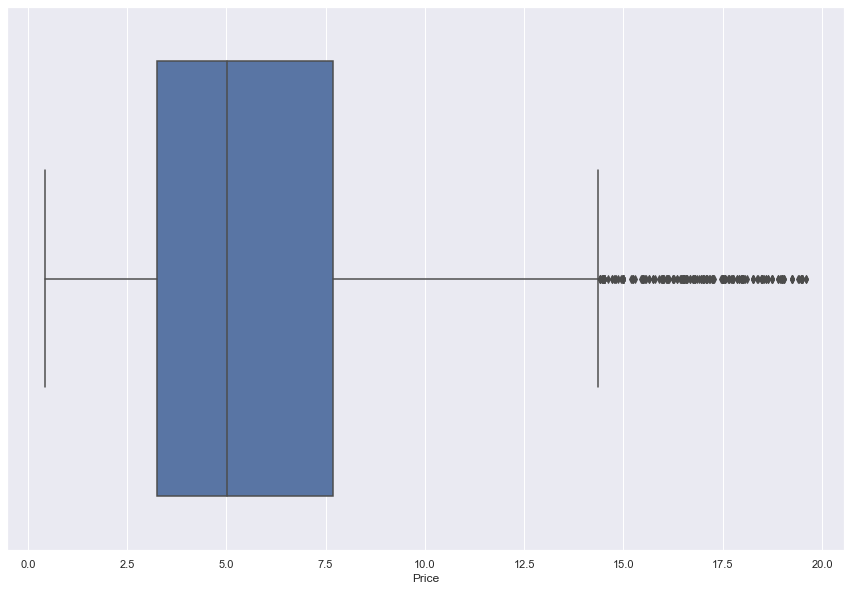

In [266]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Price'])
plt.show()

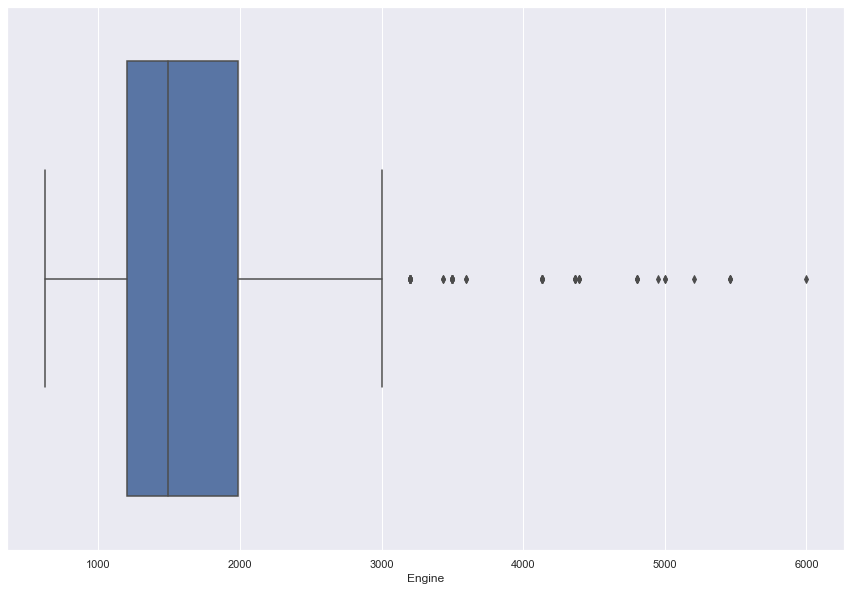

In [267]:
##.........Engine........##
## ploting boxplot to check outliers
sns.boxplot(x=new_train['Engine'])
plt.show()

In [268]:
## calculating IQR and upper limit and lower limit to find outliers
Q1 = new_train.Engine.quantile(0.25)
Q3 = new_train.Engine.quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

In [269]:
## checking outlier
new_train[(new_train.Engine < lowerlimit)  | (new_train.Engine > upperlimit)]

Kilometers_Driven  Mileage  Engine   Price
70                73000     8.50    4806   14.50
152               35277     7.81    5461   30.00
459               51002    11.33    4134   48.91
586               79926    11.33    4134   29.77
589               47088    10.13    3498   19.00
...                 ...      ...     ...     ...
5728              43600    10.93    3498   10.24
5781               6500     6.40    5204  120.00
5885              93000    11.80    3498   15.00
5919               8000    12.50    5000  100.00
6011              53000     0.00    3597    4.75

[61 rows x 4 columns]

In [270]:
## Drop all the rows containing height beyond lower and upper limit.
df1 = new_train[(new_train.Engine > lowerlimit) & (new_train.Engine < upperlimit)]
df1.shape

(5914, 4)

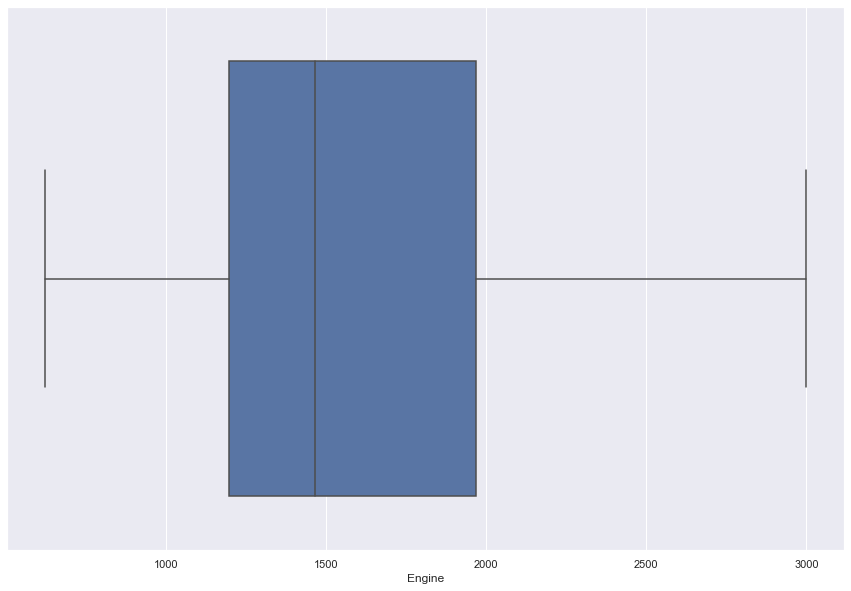

In [271]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df1['Engine'])
plt.show()

# Standard Deviation method

In [272]:
##.......Kilometers-Driven........##
std = new_train.Kilometers_Driven.std()
mean = new_train.Kilometers_Driven.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_train = new_train[(new_train.Kilometers_Driven>lowerlimit) & (new_train.Kilometers_Driven<upperlimit)]

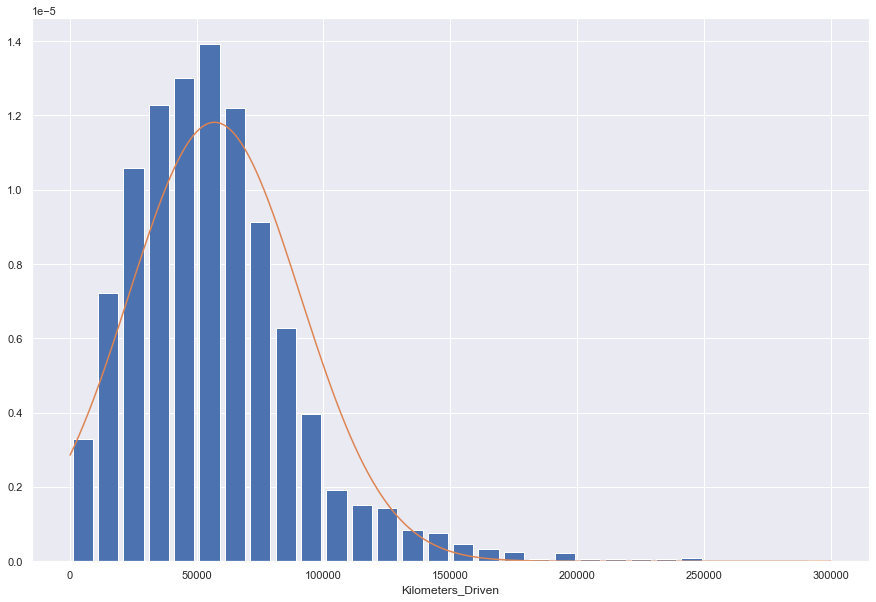

In [273]:
plt.hist(new_train.Kilometers_Driven, bins=30, rwidth=0.8, density=True)
plt.xlabel('Kilometers_Driven')
rang = np.arange(new_train.Kilometers_Driven.min(),new_train.Kilometers_Driven.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_train.Kilometers_Driven.mean(), new_train.Kilometers_Driven.std()))
plt.show()

In [274]:
##..........Mileage..........#
std = new_train.Mileage.std()
mean = new_train.Mileage.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_train = new_train[(new_train.Mileage>lowerlimit) & (new_train.Mileage<upperlimit)]

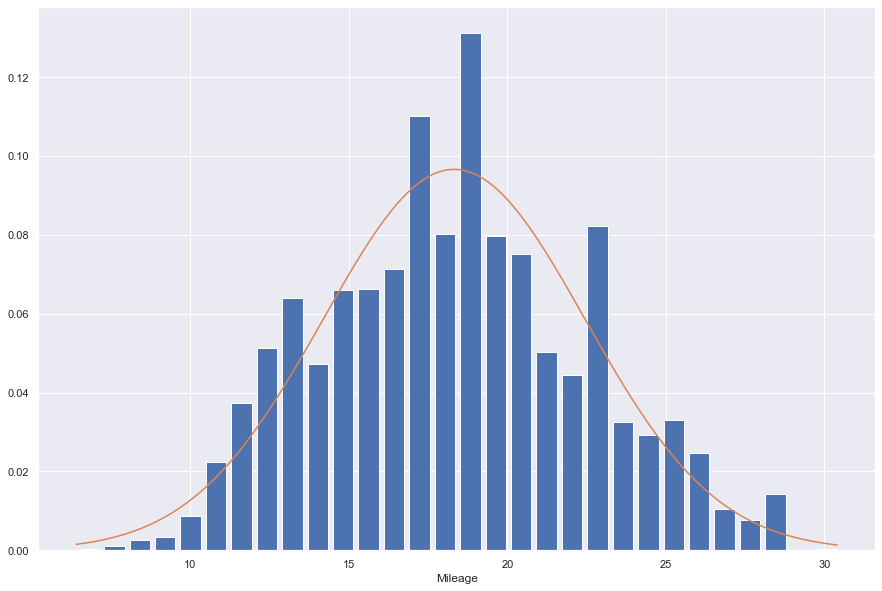

In [275]:
plt.hist(new_train.Mileage, bins=30, rwidth=0.8, density=True)
plt.xlabel('Mileage')
rang = np.arange(new_train.Mileage.min(),new_train.Mileage.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_train.Mileage.mean(), new_train.Mileage.std()))
plt.show()

In [276]:
#Engine..........##
std = new_train.Engine.std()
mean = new_train.Engine.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_train = new_train[(new_train.Engine>lowerlimit) & (new_train.Engine<upperlimit)]

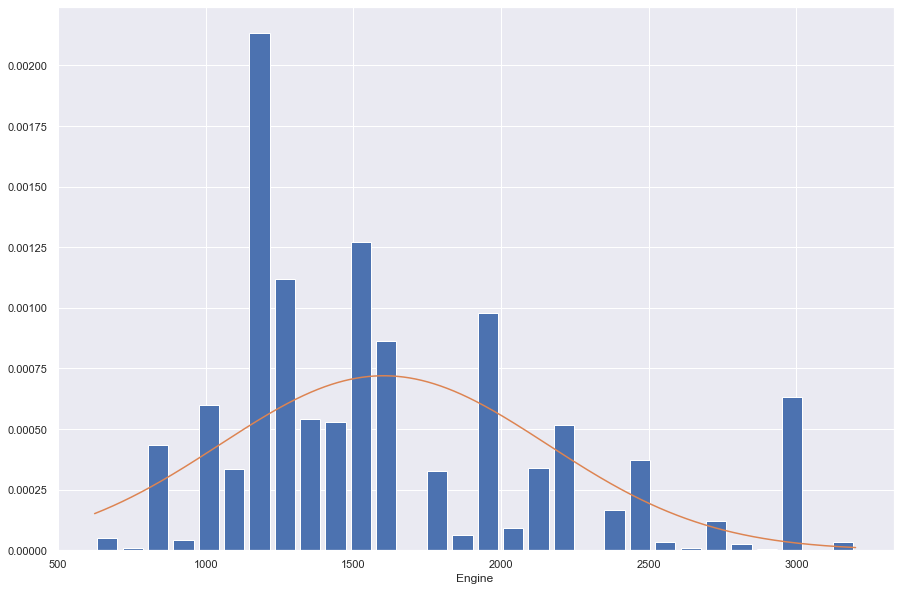

In [277]:
plt.hist(new_train.Engine, bins=30, rwidth=0.8, density=True)
plt.xlabel('Engine')
rang = np.arange(new_train.Engine.min(),new_train.Engine.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_train.Engine.mean(), new_train.Engine.std()))
plt.show()

In [278]:
##.......Price......
std = new_train.Price.std()
mean = new_train.Price.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_train = new_train[(new_train.Price>lowerlimit) & (new_train.Price<upperlimit)]

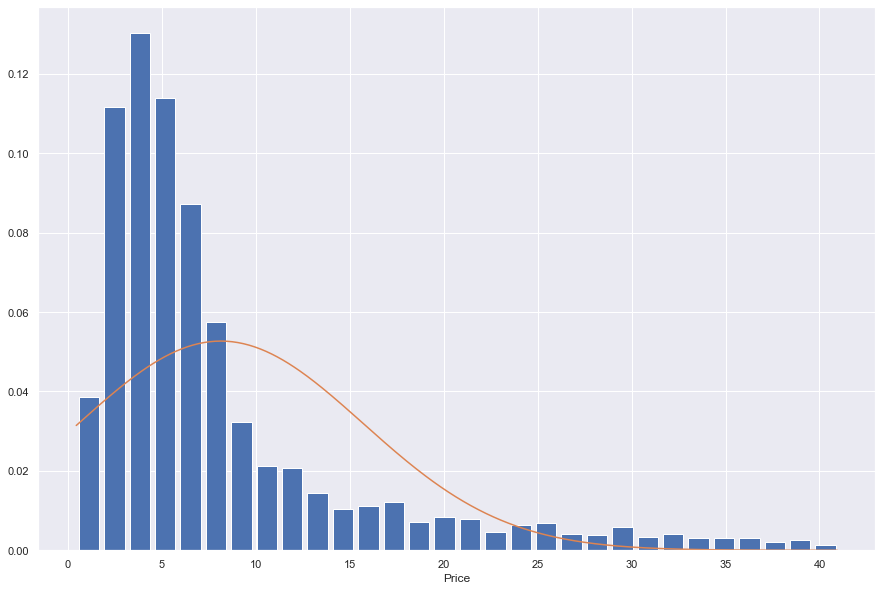

In [279]:
plt.hist(new_train.Price, bins=30, rwidth=0.8, density=True)
plt.xlabel('Price')
rang = np.arange(new_train.Price.min(),new_train.Price.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_train.Price.mean(), new_train.Price.std()))
plt.show()

## Transformation

### Log Transformation

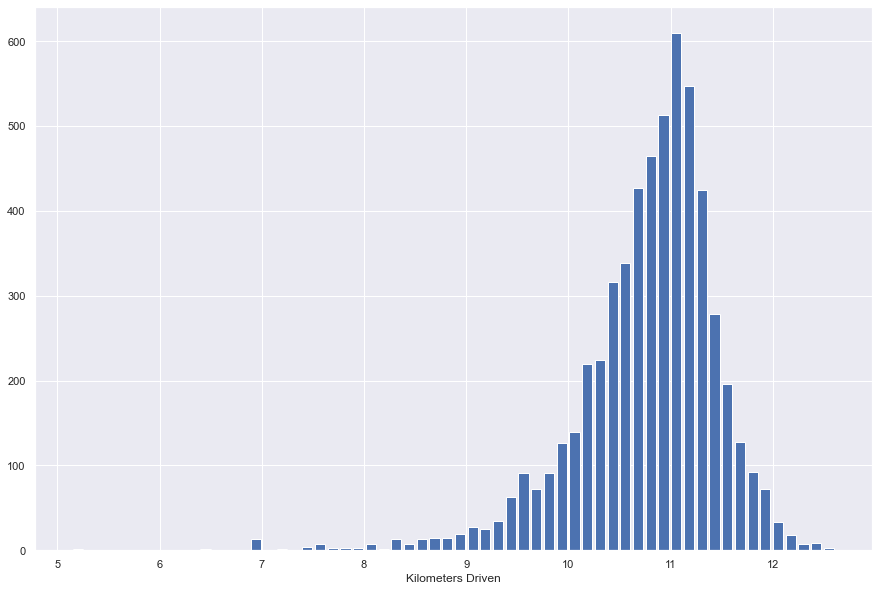

In [280]:
x = np.log(new_train.Kilometers_Driven)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

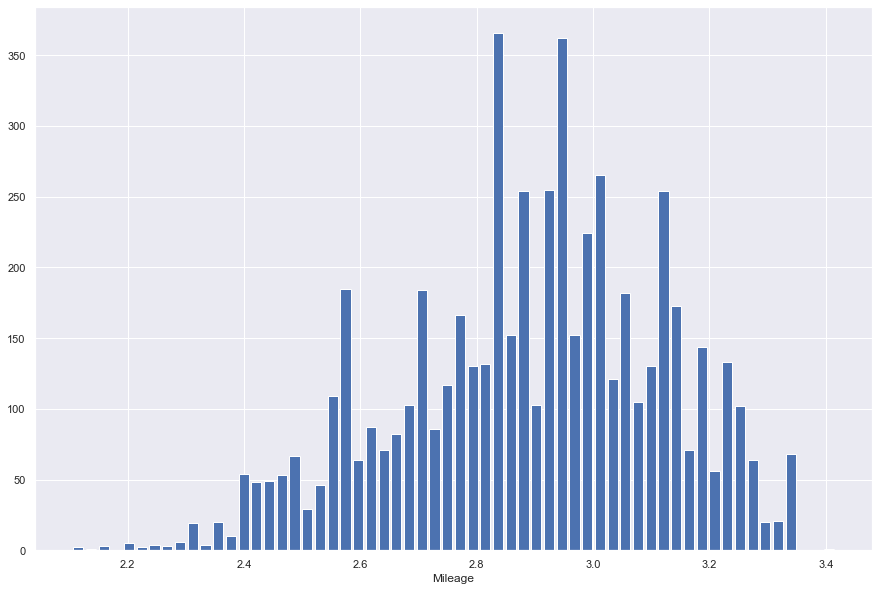

In [281]:
x = np.log(new_train.Mileage)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Mileage')
plt.show()

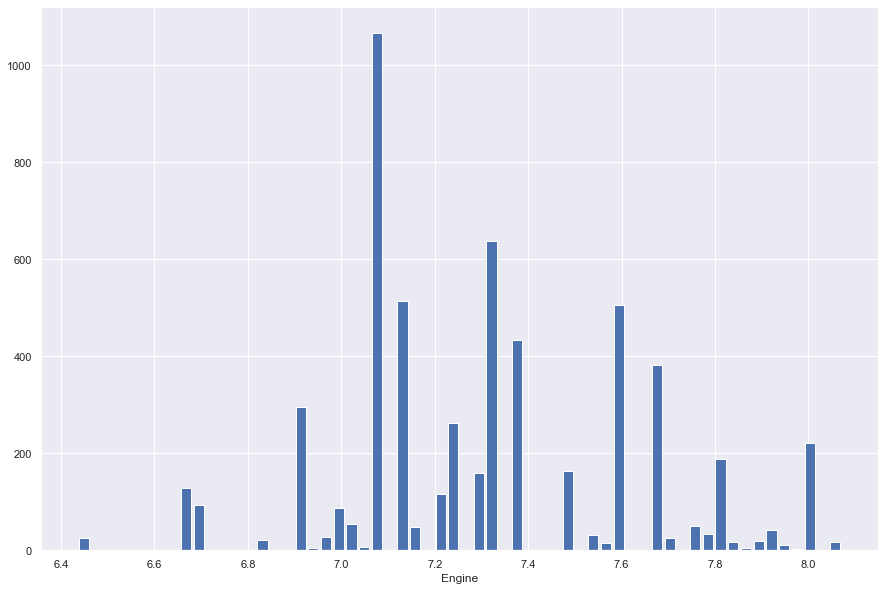

In [282]:
x = np.log(new_train.Engine)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Engine')
plt.show()

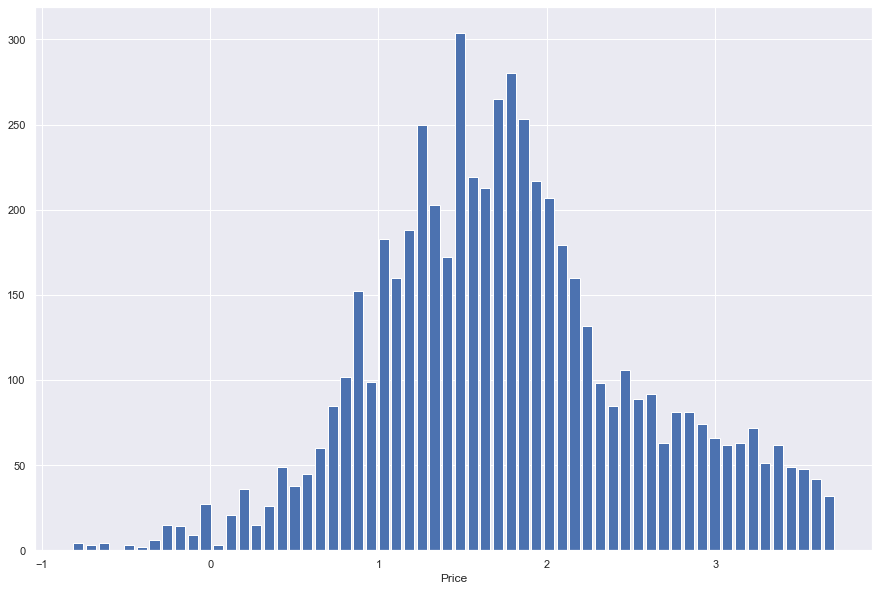

In [283]:
x = np.log(new_train.Price)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Price')
plt.show()

### 3 Feature Scaling

In [284]:
#Using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(new_train)
new_traindf1 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
new_traindf1.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.239567  0.826595  0.145186  0.032298
1           0.136174  0.515274  0.371894  0.297337
2           0.152850  0.449236  0.223214  0.100099
3           0.289595  0.564690  0.242236  0.137081
4           0.135074  0.314465  0.521739  0.426529

In [285]:
#Using Standardsaclar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(new_train)
new_traindf2 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
new_traindf2.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.428930  1.998539 -1.093007 -0.843547
1          -0.491103  0.295280  0.011841  0.576258
2          -0.342711 -0.066017 -0.712743 -0.480341
3           0.874107  0.565639 -0.620041 -0.282229
4          -0.500897 -0.803358  0.742100  1.268330

In [286]:
#Using RobustScalar
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
numeric = scaler.fit_transform(new_train)
new_traindf3 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine','Price'])
new_traindf3.head()

Kilometers_Driven   Mileage    Engine     Price
0           0.468371  1.467391 -0.600519 -0.657895
1          -0.335321  0.211957  0.156939  1.228070
2          -0.205693 -0.054348 -0.339818 -0.175439
3           0.857254  0.411232 -0.276265  0.087719
4          -0.343876 -0.597826  0.657588  2.147368

### Testing Part

In [287]:
#selecting some columns and creatin new dataframe
new_testdf = df_test[['Kilometers_Driven','Mileage','Engine']]

### Removing outliers

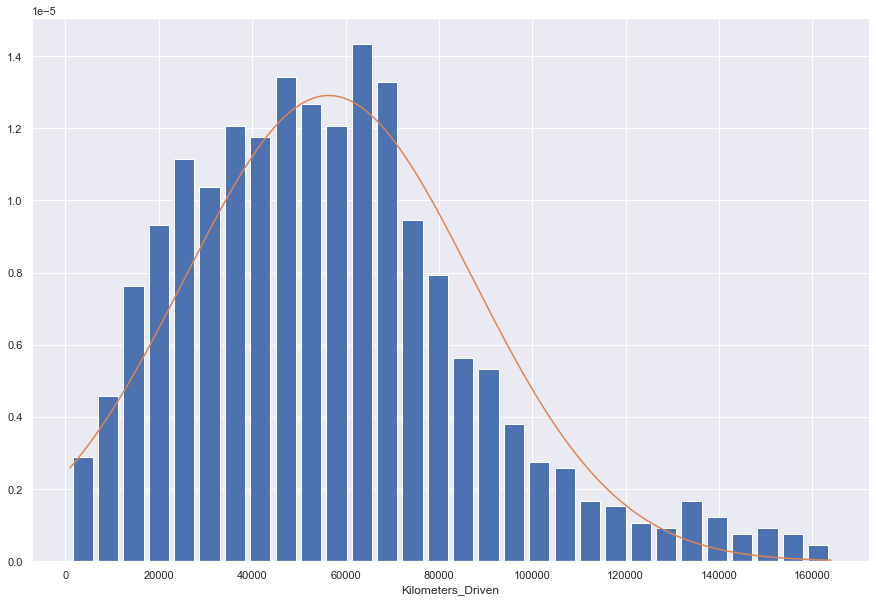

In [288]:
std = new_testdf.Kilometers_Driven.std()
mean = new_testdf.Kilometers_Driven.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_testdf = new_testdf[(new_testdf.Kilometers_Driven>lowerlimit) & (new_testdf.Kilometers_Driven<upperlimit)]

plt.hist(new_testdf.Kilometers_Driven, bins=30, rwidth=0.8, density=True)
plt.xlabel('Kilometers_Driven')
rang = np.arange(new_testdf.Kilometers_Driven.min(),new_testdf.Kilometers_Driven.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_testdf.Kilometers_Driven.mean(), new_testdf.Kilometers_Driven.std()))
plt.show()

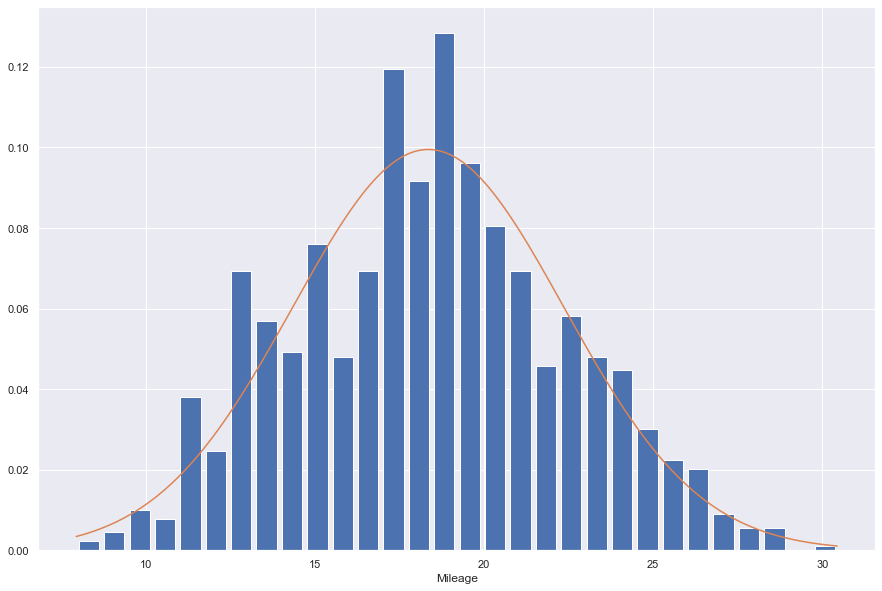

In [289]:
std = new_testdf.Mileage.std()
mean = new_testdf.Mileage.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_testdf = new_testdf[(new_testdf.Mileage>lowerlimit) & (new_testdf.Mileage<upperlimit)]

plt.hist(new_testdf.Mileage, bins=30, rwidth=0.8, density=True)
plt.xlabel('Mileage')
rang = np.arange(new_testdf.Mileage.min(),new_testdf.Mileage.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_testdf.Mileage.mean(), new_testdf.Mileage.std()))
plt.show()

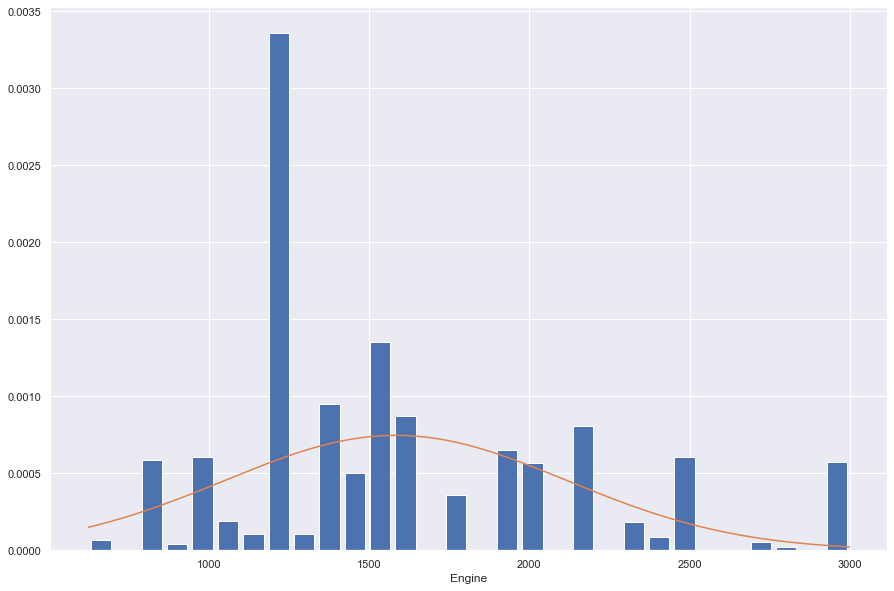

In [290]:
std = new_testdf.Engine.std()
mean = new_testdf.Engine.mean()
upperlimit = mean+(3*std)
lowerlimit = mean-(3*std)
new_testdf = new_testdf[(new_testdf.Engine>lowerlimit) & (new_testdf.Engine<upperlimit)]

plt.hist(new_testdf.Engine, bins=30, rwidth=0.8, density=True)
plt.xlabel('Engine')
rang = np.arange(new_testdf.Engine.min(),new_testdf.Engine.max(),0.1)
plt.plot(rang, norm.pdf(rang, new_testdf.Engine.mean(), new_testdf.Engine.std()))
plt.show()

### Transformation

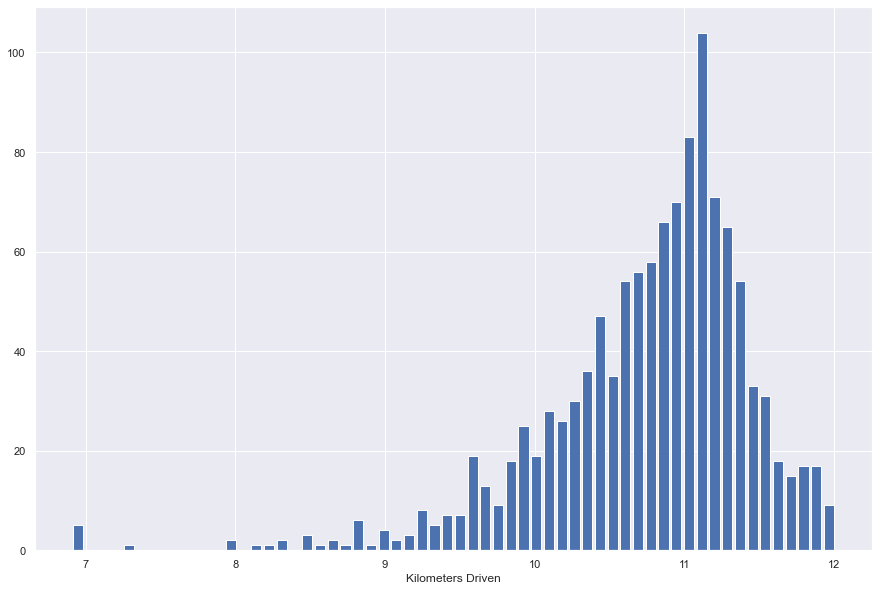

In [291]:
x = np.log(new_testdf.Kilometers_Driven)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Kilometers Driven')
plt.show()

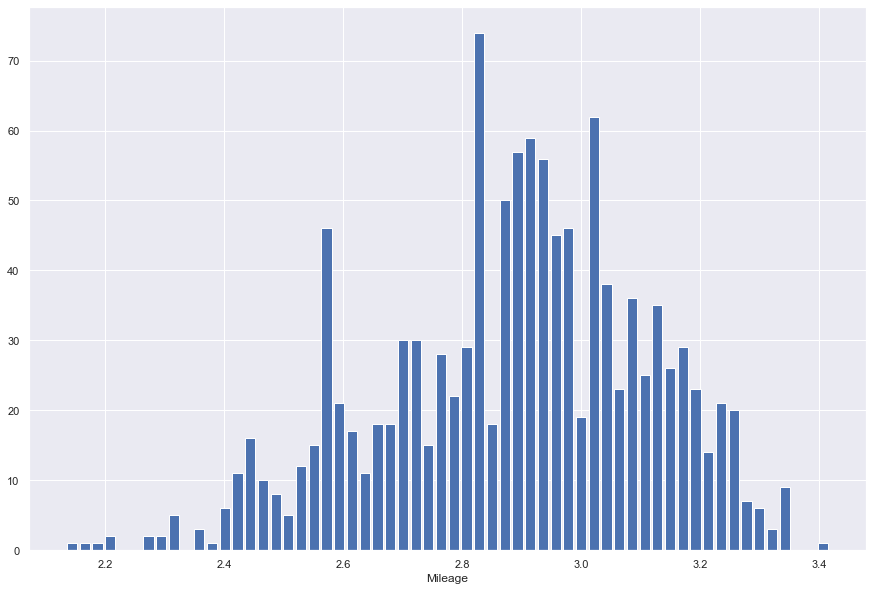

In [292]:
x = np.log(new_testdf.Mileage)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Mileage')
plt.show()

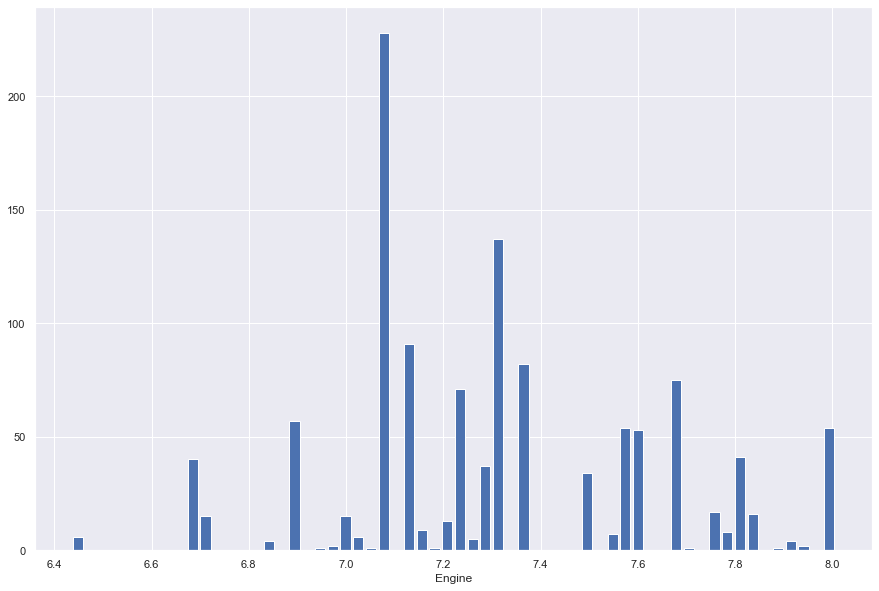

In [293]:
x = np.log(new_testdf.Engine)
plt.hist(x,bins=60,rwidth=.8)
plt.xlabel('Engine')
plt.show()

## Feature Scaling and Stamdardization

In [294]:
scaler = MinMaxScaler(feature_range=(0, 1))
numeric = scaler.fit_transform(new_testdf)
new_testdf1 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
new_testdf1.head()

Kilometers_Driven   Mileage    Engine
0           0.328178  0.738301  0.072421
1           0.202454  0.237619  0.744842
2           0.846626  0.687869  0.311579
3           0.171779  0.456611  0.241263
4           0.519074  0.343026  0.654737

In [295]:
scaler = StandardScaler()
numeric = scaler.fit_transform(new_testdf)
new_testdf2 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
new_testdf2.head()

Kilometers_Driven   Mileage    Engine
0          -0.061610  1.587536 -1.472017
1          -0.723473 -1.180398  1.515183
2           2.667714  1.308733 -0.409569
3          -0.884958  0.030259 -0.721943
4           0.943344 -0.597675  1.114895

In [296]:
scaler = RobustScaler()
numeric = scaler.fit_transform(new_testdf)
new_testdf3 = pd.DataFrame(data=numeric, columns=['Kilometers_Driven','Mileage','Engine'])
new_testdf3.head()

Kilometers_Driven   Mileage    Engine
0           0.012585  1.091228 -0.863636
1          -0.510536 -0.842105  1.210390
2           2.169779  0.896491 -0.125974
3          -0.638170  0.003509 -0.342857
4           0.806877 -0.435088  0.932468

# 5. Training Model

In [297]:
#create instance of LinearRegression
#using MinMaxScaler data
model1 = LinearRegression()
#using StandardScaler data
model2 = LinearRegression()
#using RobustScaler data
model3 = LinearRegression()

In [298]:
from sklearn.model_selection import train_test_split
## Train-Test split
X, y = new_traindf1.iloc[:,:-1],new_traindf1.Price

#use sklearn train_test_split() method to split your data into training and testing set
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size = 0.20)

In [299]:
model1.fit(X1_train,y1_train)
model1

LinearRegression()

In [300]:
model1.coef_

array([-0.53199547,  0.1506971 ,  0.72987926])

In [301]:
model1.intercept_

-0.047076720091303315

In [302]:
## Train-Test split
X, y = new_traindf2.iloc[:,:-1],new_traindf2.Price

#use sklearn train_test_split() method to split your data into training and testing set
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size = 0.20)

In [303]:
model2.fit(X2_train,y2_train)
model2

LinearRegression()

In [304]:
model2.coef_

array([-0.32522781,  0.14128705,  0.79834091])

In [305]:
model2.intercept_

-0.002618189593985268

In [306]:
## Train-Test split
X, y = new_traindf3.iloc[:,:-1],new_traindf3.Price

#use sklearn train_test_split() method to split your data into training and testing set
X3_train,X3_test,y3_train,y3_test = train_test_split(X,y,test_size = 0.20)

In [307]:
model3.fit(X3_train,y3_train)
model3

LinearRegression()

In [308]:
model3.coef_

array([-0.49454322,  0.27405475,  1.55449003])

In [309]:
model3.intercept_

0.27861972903304777

# 6. Prediction

In [310]:
model1.predict(X1_test)

array([0.14818398, 0.17080365, 0.02134681, ..., 0.23552339, 0.27855054,
       0.11770873])

In [311]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.239567,0.826595,0.145186]).reshape(-1,3)
model1.predict(x) 

C:\Users\SonamCheda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.05600845])

In [312]:
model2.predict(X2_test)

array([-0.83855428, -0.31647066, -0.58919648, ...,  0.57255598,
        0.49881178, -0.49651741])

In [313]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.436653,1.991182,-1.096283]).reshape(-1,3)
model2.predict(x) 

C:\Users\SonamCheda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.73850923])

In [314]:
model3.predict(X3_test)

array([ 1.14650167,  0.00536872,  1.12985894, ...,  0.20905276,
        0.46642389, -0.46430107])

In [315]:
#checking the model by mapping the output value with the dataset value
x = np.array([0.478080,1.464738,-0.600519]).reshape(-1,3)
model3.predict(x)

C:\Users\SonamCheda\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.48989388])

# 7. Evaluating your Model

In [316]:
#accuracy score for training set
model1.score(X1_train,y1_train)

0.5117341376551723

In [317]:
#accuracy score for test set
model1.score(X1_test,y1_test)

0.48434023405315685

In [318]:
#accuracy score for training set
model2.score(X2_train,y2_train)

0.5068389838850338

In [319]:
#accuracy score for test set
model2.score(X2_test,y2_test)

0.5028217148272256

In [320]:
#accuracy score for training set
model3=model3.score(X3_train,y3_train)
print(model3)
#accuracy score for test set
model1.score(X1_test,y3_test)


0.5045790902302396


-0.05230056828058105

# SUBMISSION DATE: 2nd April 2022